In [47]:
!pip install pystac-client odc-stac

In [48]:
!pip install xarray-spatial pyarrow stackstac "dask[distributed]"

In [53]:
from pystac_client import Client
from odc.stac import load
import odc.geo
import xrspatial.multispectral as ms
import stackstac
import numpy as np
from dask.distributed import Client as ClientDask, progress
import matplotlib.pyplot as plt
import xarray as xr

In [54]:
# use publically available stac link such as
client = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1") 

# ID of the collection
collection = "sentinel-2-l2a"

# Geometry of AOI
geometry = {
    "coordinates": [
        [
            [74.66218437999487, 19.46556170905807],
            [74.6629598736763, 19.466339343697722],
            [74.6640371158719, 19.4667885366414],
            [74.66395296156406, 19.46614872872264],
            [74.66376889497042, 19.466150941501425],
            [74.66369077563286, 19.46577508478787],
            [74.6635865047574, 19.465278788212864],
            [74.66282073408365, 19.46540270444271],
            [74.66218437999487, 19.46556170905807],
        ]
    ],
    "type": "Polygon",
}

In [ ]:
# Specific Date
date_YYMMDD = "2024-01"
# run pystac client search to see available dataset
search = client.search(
    collections=[collection], intersects=geometry, datetime=date_YYMM
)
# spit out data as GeoJSON dictionary
print(search.item_collection_as_dict())

### Console - {'type': 'FeatureCollection', 'features': []}

{'type': 'FeatureCollection', 'features': [{'id': 'S2A_MSIL2A_20230129T053101_R105_T43QDB_20240808T021158', 'bbox': [74.0443157, 18.9017046, 75.0932423, 19.8964027], 'type': 'Feature', 'links': [{'rel': 'collection', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a'}, {'rel': 'parent', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a'}, {'rel': 'root', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/'}, {'rel': 'self', 'type': 'application/geo+json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2A_MSIL2A_20230129T053101_R105_T43QDB_20240808T021158'}, {'rel': 'license', 'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice'}, {'rel': 'preview', 'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/map?collection=sentinel-2-

In [56]:
# Complete month
date_YYMM = "2023-01"
# run pystac client search to see available dataset
search = client.search(
    collections=[collection], intersects=geometry, datetime=date_YYMM
) 
# spit out data as GeoJSON dictionary
print(search.item_collection_as_dict())
# loop through each item
for item in search.items_as_dicts():
    print(item)

{'type': 'FeatureCollection', 'features': [{'id': 'S2A_MSIL2A_20230129T053101_R105_T43QDB_20240808T021158', 'bbox': [74.0443157, 18.9017046, 75.0932423, 19.8964027], 'type': 'Feature', 'links': [{'rel': 'collection', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a'}, {'rel': 'parent', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a'}, {'rel': 'root', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/'}, {'rel': 'self', 'type': 'application/geo+json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2A_MSIL2A_20230129T053101_R105_T43QDB_20240808T021158'}, {'rel': 'license', 'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice'}, {'rel': 'preview', 'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/map?collection=sentinel-2-

In [57]:
# Date range
date_range = "2023-01-10/2023-01-20"
# run pystac client search to see available dataset
search = client.search(
    collections=[collection], intersects=geometry, datetime=date_range
)
# spit out data as GeoJSON dictionary
print(search.item_collection_as_dict())
# loop through each item
for item in search.items_as_dicts():
    print(item)

{'type': 'FeatureCollection', 'features': [{'id': 'S2A_MSIL2A_20230119T053141_R105_T43QDB_20230120T235103', 'bbox': [74.0443157, 18.9017046, 75.0932423, 19.8964027], 'type': 'Feature', 'links': [{'rel': 'collection', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a'}, {'rel': 'parent', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a'}, {'rel': 'root', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/'}, {'rel': 'self', 'type': 'application/geo+json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2A_MSIL2A_20230119T053141_R105_T43QDB_20230120T235103'}, {'rel': 'license', 'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice'}, {'rel': 'preview', 'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/map?collection=sentinel-2-

In [58]:
# additional filters as per metadata 
filters = {
    "s2:vegetation_percentage": {"gt": 25}
}
# run pystac client search to see available dataset 
search = client.search(collections=[collection], intersects=geometry , query=filters ,datetime=date_YYMM) #bbox=tas_bbox
#spit out data as GeoJSON dictionary
print(search.item_collection_as_dict())
# loop through each item
for item in search.items_as_dicts():
    print(item)

{'type': 'FeatureCollection', 'features': [{'id': 'S2A_MSIL2A_20230109T053221_R105_T43QDB_20230109T183307', 'bbox': [74.0443157, 18.9017046, 75.0932423, 19.8964027], 'type': 'Feature', 'links': [{'rel': 'collection', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a'}, {'rel': 'parent', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a'}, {'rel': 'root', 'type': 'application/json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/'}, {'rel': 'self', 'type': 'application/geo+json', 'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/sentinel-2-l2a/items/S2A_MSIL2A_20230109T053221_R105_T43QDB_20230109T183307'}, {'rel': 'license', 'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice'}, {'rel': 'preview', 'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/map?collection=sentinel-2-

In [59]:
#load the data in xarray format
data = load(search.items() ,geopolygon=geometry,groupby="solar_day", chunks={})
print(data)

<xarray.Dataset> Size: 23kB
Dimensions:      (y: 18, x: 20, time: 1)
Coordinates:
  * y            (y) float64 144B 2.153e+06 2.153e+06 ... 2.152e+06 2.152e+06
  * x            (x) float64 160B 4.645e+05 4.646e+05 ... 4.647e+05 4.647e+05
    spatial_ref  int32 4B 32643
  * time         (time) datetime64[ns] 8B 2023-01-09T05:32:21.024000
Data variables: (12/16)
    AOT          (time, y, x) float32 1kB dask.array<chunksize=(1, 18, 20), meta=np.ndarray>
    B01          (time, y, x) float32 1kB dask.array<chunksize=(1, 18, 20), meta=np.ndarray>
    B02          (time, y, x) float32 1kB dask.array<chunksize=(1, 18, 20), meta=np.ndarray>
    B03          (time, y, x) float32 1kB dask.array<chunksize=(1, 18, 20), meta=np.ndarray>
    B04          (time, y, x) float32 1kB dask.array<chunksize=(1, 18, 20), meta=np.ndarray>
    B05          (time, y, x) float32 1kB dask.array<chunksize=(1, 18, 20), meta=np.ndarray>
    ...           ...
    B11          (time, y, x) float32 1kB dask.array<chun

In [60]:
items = search.item_collection()

data = (
    stackstac.stack(
        items,
        epsg=32619,
        resolution=500,
        assets=["B02", "B03", "B04", "B08"],  # blue, green, red, nir
        chunksize=256,  # set chunk size to 256 to get one chunk per time step
    )
    .where(lambda x: x > 0, other=np.nan)  # sentinel-2 uses 0 as nodata
    .assign_coords(
        band=lambda x: x.common_name.rename("band"),  # use common names
        time=lambda x: x.time.dt.round(
            "D"
        ),  # round time to daily for nicer plot labels
    )
)
data

<xarray.DataArray 'stackstac-68115dbc452f41a9ddc9c630cea450c7' (time: 1,
                                                                band: 4,
                                                                y: 323, x: 323)> Size: 3MB
dask.array<where, shape=(1, 4, 323, 323), dtype=float64, chunksize=(1, 1, 256, 256), chunktype=numpy.ndarray>
Coordinates: (12/46)
    id                                       (time) <U54 216B 'S2A_MSIL2A_202...
  * x                                        (x) float64 3kB 4.458e+06 ... 4....
  * y                                        (y) float64 3kB 1.746e+07 ... 1....
    platform                                 <U11 44B 'Sentinel-2A'
    s2:saturated_defective_pixel_percentage  float64 8B 0.0
    s2:product_uri                           <U65 260B 'S2A_MSIL2A_20230109T0...
    ...                                       ...
    common_name                              (band) <U5 80B 'blue' ... 'nir'
    center_wavelength                        (band) float64 32B 0.49 ... 0.842
    full_width_half_max                      (band) float64 32B 0.098 ... 0.145
    epsg                                     int64 8B 32619
  * band                                     (band) <U5 80B 'blue' ... 'nir'
  * time                                     (time) datetime64[ns] 8B 2023-01-09
Attributes:
    spec:        RasterSpec(epsg=32619, bounds=(4458500, 17297000, 4620000, 1...
    crs:         epsg:32619
    transform:   | 500.00, 0.00, 4458500.00|\n| 0.00,-500.00, 17458500.00|\n|...
    resolution:  500

In [61]:
from dask.distributed import Client

client = Client()  # This starts a local Dask scheduler and workers
data = data.persist()
progress(data)

c:\Users\carnu\Documents\Clients\NASA\pystac-client\.venv\Lib\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 3555 instead
  warnings.warn(


VBox()

In [62]:
rc = {
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.bottom": False,
    "axes.spines.top": False,
    "xtick.bottom": False,
    "xtick.labelbottom": False,
    "ytick.labelleft": False,
    "ytick.left": False,
}

plt.rcParams.update(rc)

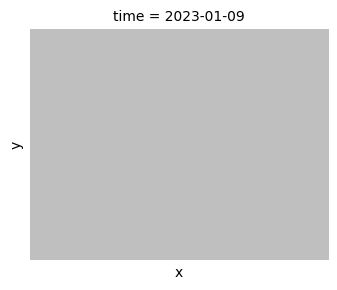

In [63]:
true_color_aggs = [
    ms.true_color(x.sel(band="red"), x.sel(band="green"), x.sel(band="blue"))
    for x in data
]

true_color = xr.concat(true_color_aggs, dim=data.coords["time"])

# visualize
t = true_color.plot.imshow(x="x", y="y", col="time", col_wrap=5)

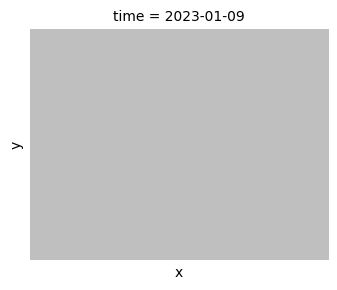

In [65]:
true_color_aggs = [
    ms.true_color(x.sel(band="red"), x.sel(band="green"), x.sel(band="blue"))
    for x in data
]

true_color = xr.concat(true_color_aggs, dim=data.coords["time"])

# visualize
t = true_color.plot.imshow(x="x", y="y", col="time", col_wrap=5)

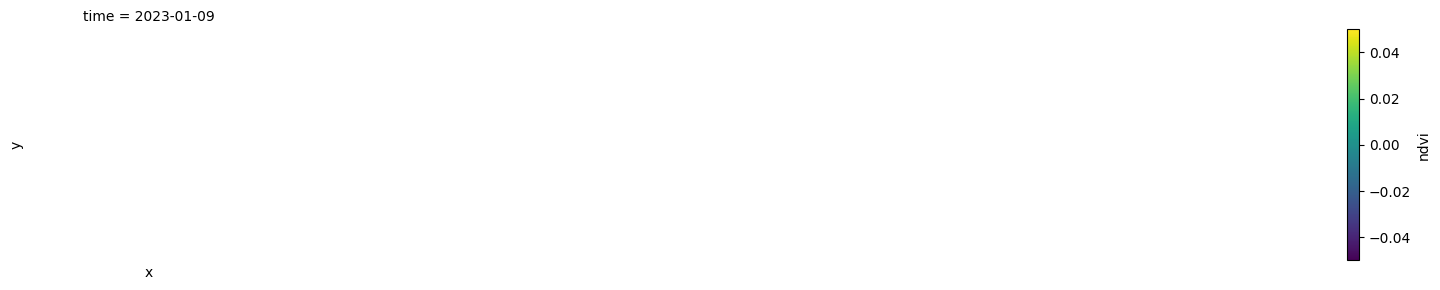

In [66]:
ndvi_aggs = [ms.ndvi(x.sel(band="nir"), x.sel(band="red")) for x in data]

ndvi = xr.concat(ndvi_aggs, dim="time")

ndvi.plot.imshow(x="x", y="y", col="time", col_wrap=5, cmap="viridis");